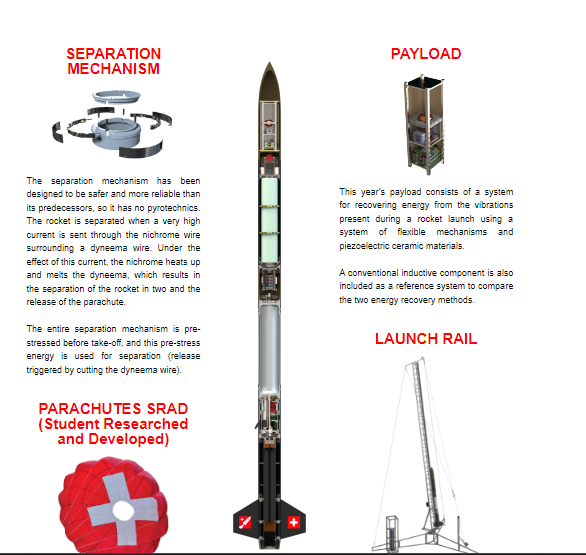

# Project Name: #PSLV_India Rocket simulation with machine learning

Contributer : Rajeev singh sisodiya

Project details : PSLV_India is an optimized (imaginery) rocket which takes up the bases of PSLV_India I, it thus has the same structure and the same type of engine but brings many technical innovations like for example its structural tank which support the structural efforts of the rocket or its mechanism of separation which functions without pyrotechnics. This mechanism has also been selected by ESA to participate in the “European Space Mechanism and Tribology Symposium”.  # Dataset : We have used here powerOffDragCurve.csv as our dataset and Cesaroni_6026M1670-P.eng as our solid fule motor

In [ ]:
%pip install rocketpy --pre

In [ ]:
%pip install -e

In [156]:
from rocketpy import Environment, SolidMotor, Rocket, Flight, Function

In [ ]:
%load_ext autoreload


In [158]:
%autoreload 2

In [159]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

from rocketpy import Environment, Flight, Function, Rocket, SolidMotor

In [160]:
plt.style.use("seaborn-v0_8-dark-palette")

# Define a dictionary with the inputs for the simulation



In [161]:
parameters = {
    # Mass Details
    "rocket_mass": (18.227 - 0.001, 0.010),  # propellant mass = 1.373
    # propulsion details
    "impulse": (2157, 0.03 * 2157),
    "burn_time": (2.43, 0.1),
    "nozzle_radius": (44.45 / 1000, 0.001),
    "throat_radius": (21.4376 / 1000, 0.001),
    "grain_separation": (3 / 1000, 1 / 1000),
    "grain_density": (782.4, 30),
    "grain_outer_radius": (85.598 / 2000, 0.001),
    "grain_initial_inner_radius": (33.147 / 1000, 0.002),
    "grain_initial_height": (152.4 / 1000, 0.001),
    # Aerodynamic Details
    "inertia_i": (0.78267, 0.03 * 0.78267),
    "inertia_z": (0.064244, 0.03 * 0.064244),
    "radius": (156 / 2000, 0.001),
    "distance_rocket_nozzle": (-1.1356, 0.100),
    "distance_rocket_propellant": (-1, 0.100),
    "power_off_drag": (1, 0.05),
    "power_on_drag": (1, 0.05),
    "nose_length": (0.242, 0.001),
    "nose_distance_to_cm": (1.3, 0.100),
    "fin_span": (0.200, 0.001),
    "fin_root_chord": (0.280, 0.001),
    "fin_tip_chord": (0.125, 0.001),
    "fin_distance_to_cm": (-0.75, 0.100),
    "tail_top_radius": (156 / 2000, 0.001),
    "tail_bottom_radius": (135 / 2000, 0.001),
    "tail_length": (0.050, 0.001),
    "tail_distance_to_cm": (-1.0856, 0.001),
    # Launch and Environment Details
    "wind_direction": (0, 5),
    "wind_speed": (1, 0.05),
    "inclination": (89, 1),
    "heading": (45, 5),
    "rail_length": (4.2, 0.001),
    # Parachute Details
    "CdS_drogue": (np.pi / 4, 0.20 * np.pi / 4),
    "lag_rec": (1, 0.020),
}

# Environment

In [162]:
# Environment conditions
env = Environment(
    gravity=9.81,
    latitude=47.213476,
    longitude=9.003336,
    date=(2023, 11, 11, 12),
    elevation=407,
)


In [163]:
env.set_atmospheric_model(type="Forecast", file="GFS")


Gravity Details

Acceleration of Gravity at Lauch Site: 9.81 m/s²


Launch Site Details

Launch Date: 2023-11-11 12:00:00 UTC
Launch Site Latitude: 47.21348°
Launch Site Longitude: 9.00334°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 500252.61 E    5228887.37 N
Launch Site UTM zone: 32T
Launch Site Surface Elevation: 940.4 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 78.801 km
Forecast Time Period: From  2023-10-30 12:00:00  to  2023-11-15 12:00:00  UTC
Forecast Hour Interval: 3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Surface Atmospheric Conditions

Surface Wind Speed: 1.43 m/s
Surface Wind Direction: 281.93°
Surface Wind Heading: 101.93°
Surface Pressure: 904.88 hPa
Surface Temperature: 273.62 K
Surface Air Density: 1.152 kg/m³
Surface Speed of Sound: 331.60 m/s


Atmospheric Model Plots



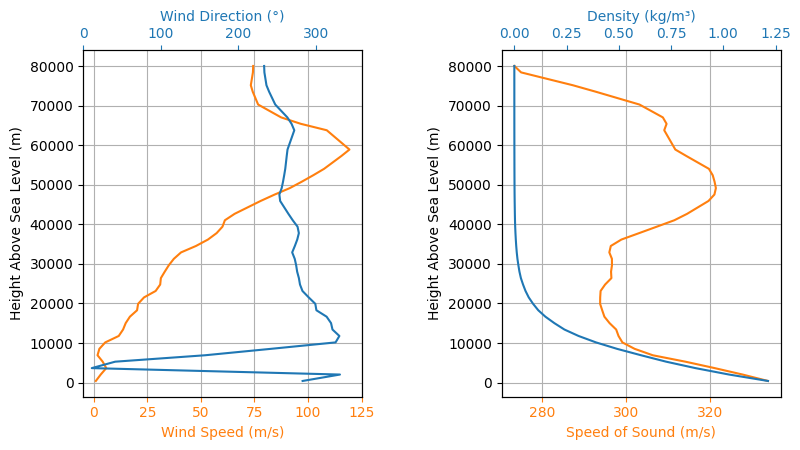

In [164]:
env.info()

In [165]:
Cesaroni_6026M1670 = SolidMotor(
    thrust_source="/content/Cesaroni_6026M1670-P.eng",
    burn_time=parameters.get("burn_time")[0],
    dry_mass=0.001,
    dry_inertia=(0, 0, 0),
    center_of_dry_mass_position=0.3,
    grains_center_of_mass_position=0.3,
    grain_number=3,
    grain_separation=parameters.get("grain_separation")[0],
    grain_density=parameters.get("grain_density")[0],
    grain_outer_radius=parameters.get("grain_outer_radius")[0],
    grain_initial_inner_radius=parameters.get("grain_initial_inner_radius")[0],
    grain_initial_height=parameters.get("grain_initial_height")[0],
    nozzle_radius=parameters.get("nozzle_radius")[0],
    throat_radius=parameters.get("throat_radius")[0],
    interpolation_method="linear",
    nozzle_position=0,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)


Nozzle Details
Nozzle Radius: 0.04445 m
Nozzle Throat Radius: 0.0214376 m

Grain Details
Number of Grains: 3
Grain Spacing: 0.003 m
Grain Density: 782.4 kg/m3
Grain Outer Radius: 0.042799 m
Grain Inner Radius: 0.033146999999999996 m
Grain Height: 0.1524 m
Grain Volume: 0.000 m3
Grain Mass: 0.275 kg

Motor Details
Total Burning Time: 2.43 s
Total Propellant Mass: 0.824 kg
Average Propellant Exhaust Velocity: 5565.208 m/s
Average Thrust: 1886.611 N
Maximum Thrust: 2200.0 N at 0.15 s after ignition.
Total Impulse: 4584.464 Ns



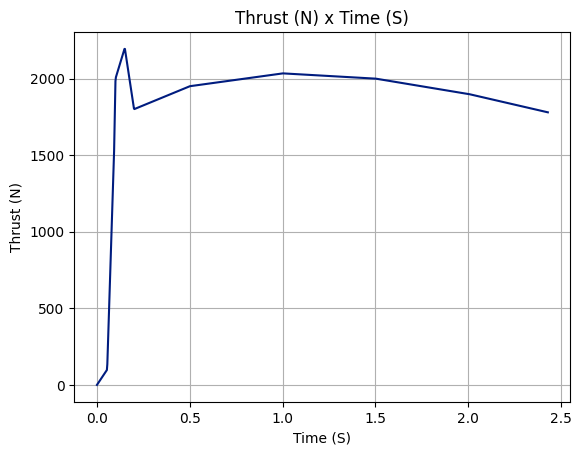

In [166]:
Cesaroni_6026M1670.info()

In [167]:
PSLV_India = Rocket(
    radius=parameters.get("radius")[0],
    mass=parameters.get("rocket_mass")[0],
    inertia=(
        parameters.get("inertia_i")[0],
        parameters.get("inertia_i")[0],
        parameters.get("inertia_z")[0],
    ),
    power_off_drag=0.43,
    power_on_drag=0.43,
    center_of_mass_without_motor=0,
)
PSLV_India.set_rail_buttons(0.1, -0.5)
PSLV_India.add_motor(motor=Cesaroni_6026M1670, position=parameters.get("distance_rocket_nozzle")[0])

In [168]:
nose_cone = PSLV_India.add_nose(
    length=parameters.get("nose_length")[0],
    kind="tangent",
    position=parameters.get("nose_distance_to_cm")[0]
    + parameters.get("nose_length")[0],
)
fin_set = PSLV_India.add_trapezoidal_fins(
    3,
    span=parameters.get("fin_span")[0],
    root_chord=parameters.get("fin_root_chord")[0],
    tip_chord=parameters.get("fin_tip_chord")[0],
    position=parameters.get("fin_distance_to_cm")[0],
)
tail = PSLV_India.add_tail(
    top_radius=parameters.get("tail_top_radius")[0],
    bottom_radius=parameters.get("tail_bottom_radius")[0],
    length=parameters.get("tail_length")[0],
    position=parameters.get("tail_distance_to_cm")[0],
)

# Adding Parachute

In [169]:
Drogue = PSLV_India.add_parachute(
    "Drogue",
    cd_s=parameters.get("CdS_drogue")[0],
    trigger="apogee",
    sampling_rate=105,
    lag=parameters.get("lag_rec")[0],
    noise=(0, 8.3, 0.5),
)


# Modify the Drag Coefficient curve

In [170]:
# Define aerodynamic drag coefficients
PSLV_India.power_off_drag = Function(
    [
        (0.01, 0.51),
        (0.02, 0.46),
        (0.04, 0.43),
        (0.28, 0.43),
        (0.29, 0.44),
        (0.45, 0.44),
        (0.49, 0.46),
    ],
    "Mach Number",
    "Drag Coefficient with Power Off",
    "linear",
    "constant",
)
PSLV_India.power_on_drag = Function(
    [
        (0.01, 0.51),
        (0.02, 0.46),
        (0.04, 0.43),
        (0.28, 0.43),
        (0.29, 0.44),
        (0.45, 0.44),
        (0.49, 0.46),
    ],
    "Mach Number",
    "Drag Coefficient with Power On",
    "linear",
    "constant",
)
PSLV_India.power_off_drag *= parameters.get("power_off_drag")[0]
PSLV_India.power_on_drag *= parameters.get("power_on_drag")[0]


In [171]:
PSLV_India.info()


Inertia Details

Rocket Mass: 18.226 kg
Rocket Dry Mass: 18.227 kg (With Motor)
Rocket Mass: 19.051 kg (With Propellant)
Rocket Inertia (with motor, but without propellant) 11: 0.783 kg*m2
Rocket Inertia (with motor, but without propellant) 22: 0.783 kg*m2
Rocket Inertia (with motor, but without propellant) 33: 0.064 kg*m2
Rocket Inertia (with motor, but without propellant) 12: 0.000 kg*m2
Rocket Inertia (with motor, but without propellant) 13: 0.000 kg*m2
Rocket Inertia (with motor, but without propellant) 23: 0.000 kg*m2


Geometrical Parameters

Rocket Maximum Radius: 0.078 m
Rocket Frontal Area: 0.019113 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass withour Motor: 0.000 m
Rocket Center of Dry Mass - Nozzle Exit Distance: 1.136 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.836 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.036 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficie

# Flight

In [172]:
# Flight
test_flight = Flight(
    rocket=PSLV_India,
    environment=env,
    rail_length=parameters.get("rail_length")[0],
    inclination=parameters.get("inclination")[0],
    heading=parameters.get("heading")[0],
)



Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 940.38 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.924 | e1: -0.008 | e2: 0.003 | e3: -0.383
Euler Angles - Spin φ : 0.00° | Nutation θ: -1.00° | Precession ψ: -45.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Surface Wind Conditions

Frontal Surface Wind Speed: 0.78 m/s
Lateral Surface Wind Speed: -1.20 m/s


Launch Rail

Launch Rail Length: 4.2  m
Launch Rail Inclination: 89.00°
Launch Rail Heading: 45.00°


Rail Departure State

Rail Departure Time: 0.331 s
Rail Departure Velocity: 22.955 m/s
Rail Departure Static Margin: 2.801 c
Rail Departure Angle of Attack: 3.587°
Rail Departure Thrust-Weight Ratio: 10.031
Rail Departure Reynolds Number: 2.404e+05


Burn out State

Burn out time: 2.430 s
Altitude at burn out: 256.107 m (AGL)
Rocket velocity at burn out: 212.659 m/s
Freestream velocity at burn out: 212.745 m/s
Mach Number at burn out: 0.643
Kinetic energy at burn out

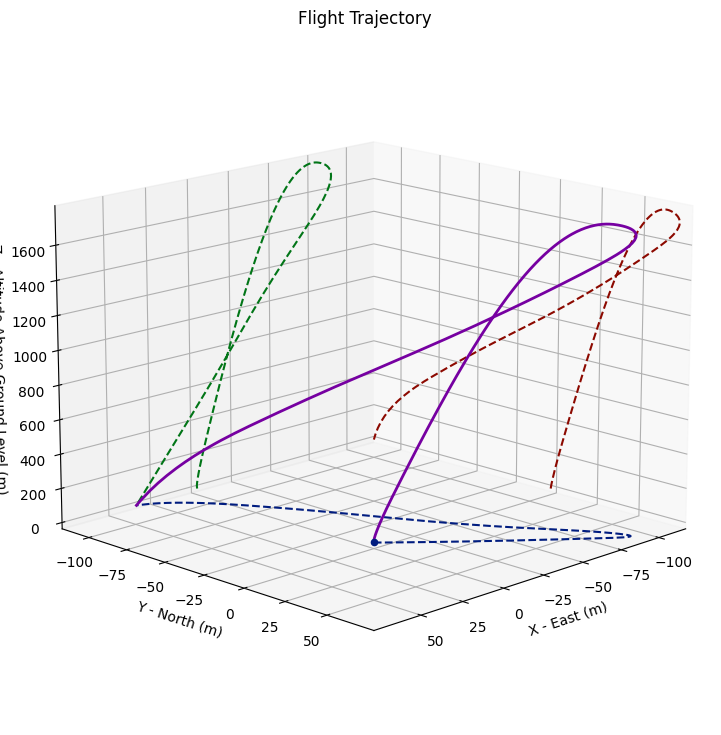

In [173]:
test_flight.info()
test_flight.plots.trajectory_3d()


# Comparison with the real flight data


In [174]:
flight_data = ("/content/powerOffDragCurve.csv")


In [175]:
actual_z = Function(
    source=np.column_stack((flight_data[1], flight_data[1])),
    inputs="Time (s)",
    outputs="Altitude above ground level (m)",
    interpolation="linear",
    extrapolation="zero",
)

actual_vz = Function(
    source=np.column_stack((flight_data[1], flight_data[2])),
    inputs="Time (s)",
    outputs="Vertical velocity (m/s)",
    interpolation="linear",
    extrapolation="zero",
)



In [176]:
simulated_z = test_flight.z - env.elevation
simulated_vz = test_flight.vz
simulated_az = test_flight.az
simulated_t_final = test_flight.t_final
simulated_apogee = test_flight.apogee - env.elevation

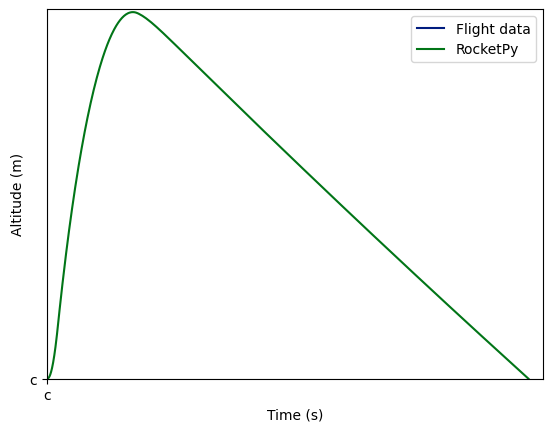

In [177]:
plt.plot(actual_z[:, 0], actual_z[:, 1], label="Flight data")
plt.plot(simulated_z[:, 0], simulated_z[:, 1], label="RocketPy")
plt.xlabel("Time (s)")
plt.ylabel("Altitude (m)")
plt.ylim(0, round(simulated_apogee, -2))
plt.xlim(0, round(simulated_t_final, -1))
plt.legend()
plt.grid()
plt.show()

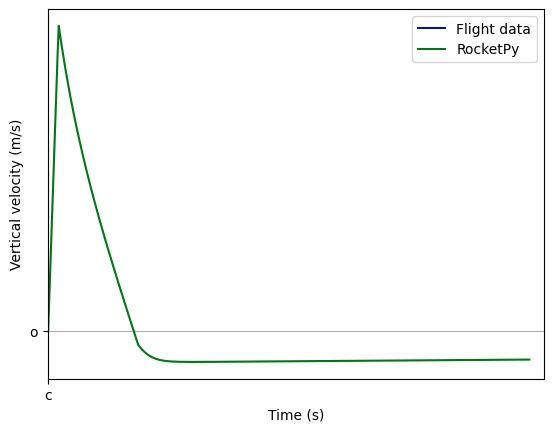

In [178]:
plt.plot(actual_vz[:, 0], actual_vz[:, 1], label="Flight data")
plt.plot(simulated_vz[:, 0], simulated_vz[:, 1], label="RocketPy")
plt.xlabel("Time (s)")
plt.ylabel("Vertical velocity (m/s)")
# plt.ylim()
plt.xlim(0, round(simulated_t_final, -1))
plt.legend()
plt.grid()
plt.show()

# Numerical comparison

In [179]:
print("Apogee (AGL)")
print(f"RocketPy: {simulated_apogee:.2f} m")

Apogee (AGL)
RocketPy: 1785.46 m


In [180]:
print("Max Velocity")
print(f"RocketPy:  {simulated_vz.max:.2f} m/s")

Max Velocity
RocketPy:  212.51 m/s


In [181]:
print("Max Acceleration")
print(f"RocketPy:  {simulated_az.max:.2f} m/s²")

Max Acceleration
RocketPy:  104.82 m/s²
